Разбираемся с вероятностями на примере решения задач из урока "Сложение и произведение вероятностей" курса "Аналитик данных" karpov.cources

Каждую задачу решаем математически, а потом пробуем замонтекарлить, то есть - создать симуляцию ситуации и опытным путем проверить как именно получается такой ответ

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize' : (15,4)}, font='verdana')
plt.style.use('dark_background')

### Сложение и произведение вероятностей

[1. Два человека одновременно стреляют по мишени. Вероятность попадания по мишени у первого стрелка равна 0,5, у второго — 0,8. Какова вероятность того, что в мишени будет только одна пробоина?](#1)

[2. Трое аналитиков на экзамене независимо друг от друга решают одну и ту же задачу. Вероятности ее решения этими аналитиками равны 0,8, 0,7 и 0,6 соответственно. Найдите вероятность того, что хотя бы один аналитик решит задачу.](#2)

[3. В первой урне находятся 10 белых и 4 черных шаров, а во второй 5 белых и 9 черных шаров. Из каждой урны вынули по шару. Какова вероятность того, что оба шара окажутся черными?](#3)

[4. Вероятность хотя бы одного попадания в цель при четырех выстрелах равна 0,9984. Найдите вероятность попадания в цель при одном выстреле.](#4)

[5. В конверте находится 10 лотерейных билетов, среди которых 3 выигрышных. Из конверта последовательно извлекаются билеты. Найти вероятность того, что три первых лотерейных билета будут выигрышными.](#5)

[6. Бросаются 2 игральных кубика. Определите вероятность того, что произведение числа очков на обоих кубиках не превосходит 10.](#6)

<a id="1"></a>
Задача:

Два человека одновременно стреляют по мишени. 

Вероятность попадания по мишени у первого стрелка равна 0,5, у второго — 0,8. 

Какова вероятность того, что в мишени будет только одна пробоина?

In [2]:
p1 = 0.5
p2 = 0.8
# одна пробоина означает = (первый промахнулся И второй попал) ИЛИ (первый попал И второй промахнулся) - полная группа событий
p = 0.5*0.8 + 0.5*0.2
p

0.5

Пишем функцию, которая создает двух стрелков с их вероятностями попадания, N раз ставит к барьеру, заставляет стрелять, проверяет и меняет мишения на новые, считая все разы, когда пробоина одна

In [3]:
# пишем функцию, которая создает двух стрелков с их вероятностями попадания, N раз ставит к барьеру, заставляет стрелять, проверяет и меняет мишения на новые, считая все разы, когда пробоина одна

def shooting (n):
    result = 0
    for _ in range(n):
        first_shooter = np.random.binomial(1,0.5)
        second_shooter = np.random.binomial(1,0.8)
        if first_shooter + second_shooter == 1:
            result = result + 1
    result = result / n
    return result

In [4]:
shooting (100)

0.51

Видим, что теоретическая вероятность, расчитанная по формулам существует исключительно при бесконечном числе испытаний. В каждом конкретном испытании вероятность всегда будет отличаться в виду конечности числа наблюдений и случайности каждого из них. Чем больше выстрелов в серии - тем меньше отклонение от теоретической вероятности. При этом результат каждой серии разный.

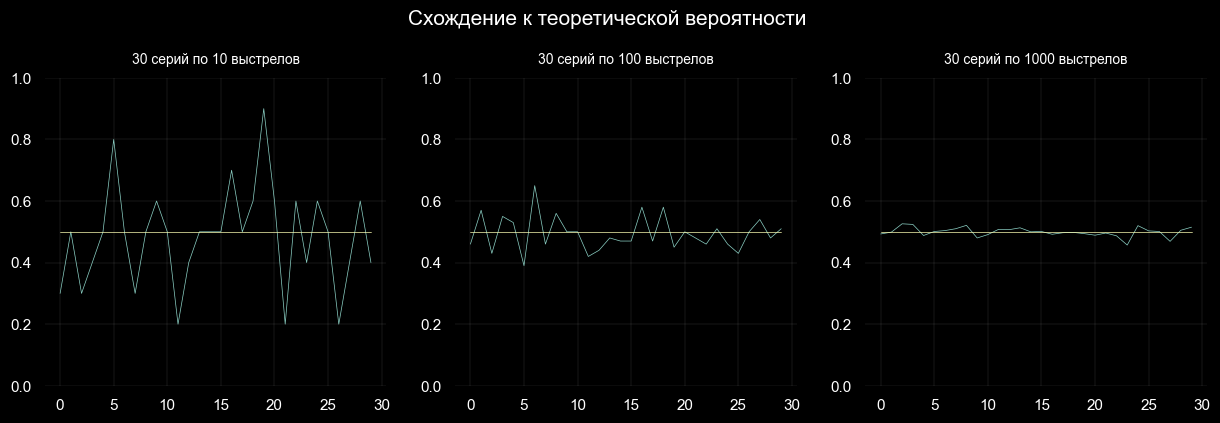

In [84]:
t10 = pd.Series([shooting (10) for _ in range(30)])
x10 = t10.index
y10 = t10.values

t100 = pd.Series([shooting (100) for _ in range(30)])
x100 = t100.index
y100 = t100.values

t1000 = pd.Series([shooting (1000) for _ in range(30)])
x1000 = t1000.index
y1000 = t1000.values

plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)

plt.suptitle('Схождение к теоретической вероятности', fontsize=15, y=1.05)

plt.subplot(1, 3, 1)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
plt.title('30 серий по 10 выстрелов', fontsize=10, pad=10)
plt.plot(x10, y10, linewidth=0.5)
plt.plot(x10, np.array([0.5]*30), linewidth=0.5)
plt.ylim(0, 1)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

plt.subplot(1, 3, 2)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
plt.title('30 серий по 100 выстрелов', fontsize=10, pad=10)
plt.plot(x100, y100, linewidth=0.5)
plt.plot(x100, np.array([0.5]*30), linewidth=0.5)
plt.ylim(0, 1)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

plt.subplot(1, 3, 3)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
plt.title('30 серий по 1000 выстрелов', fontsize=10, pad=10)
plt.plot(x1000, y1000, linewidth=0.5)
plt.plot(x1000, np.array([0.5]*30), linewidth=0.5)
plt.ylim(0, 1)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

plt.show()

Заодно проверим закон больших чисел, который гласит: чем больше число испытаний в выборке, тем ближе среднее выборки к теоретическому среднему

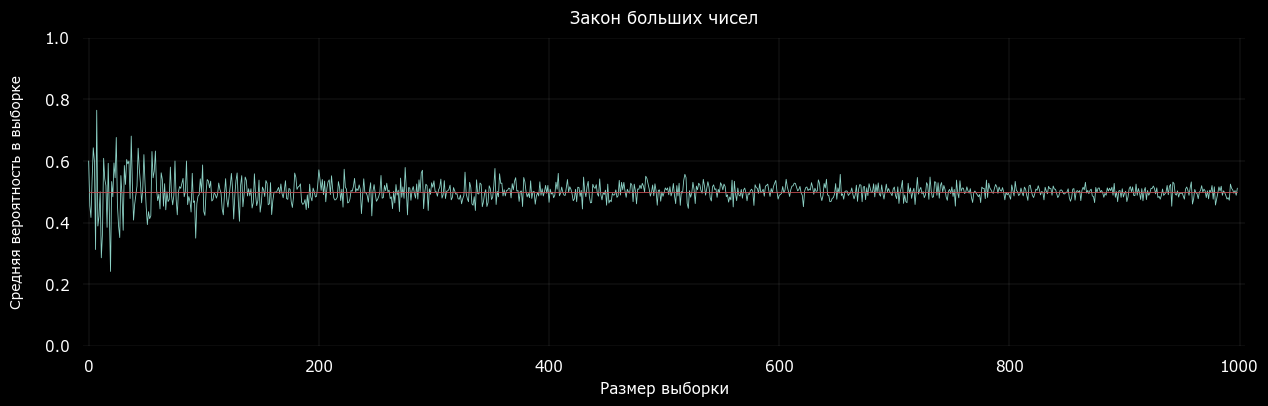

In [130]:
t = pd.Series([shooting(n) for n in range(10,1009)])

plt.plot(t.index, t.values, linewidth=0.6)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 
plt.plot(t.index, np.array([0.5]*999), '-r',linewidth=0.6)
plt.title('Закон больших чисел', fontsize=12, y=1.02)
plt.ylim(0, 1)
plt.xlim(-5, 1005)
plt.xlabel("Размер выборки", labelpad = 5, fontsize= 11)
plt.ylabel('Средняя вероятность в выборке', labelpad = 15, fontsize= 10)
plt.show()

<a id="2"></a>
Задача:

Трое аналитиков на экзамене независимо друг от друга решают одну и ту же задачу. 

Вероятности ее решения этими аналитиками равны 0,8, 0,7 и 0,6 соответственно. 

Найдите вероятность того, что хотя бы один аналитик решит задачу.


In [9]:
p1 = 0.8
p2 = 0.7
p3 = 0.6

#Хотя бы один = что угодно кроме "никто не решит"

p_no_one_solves = 0.2 * 0.3 * 0.4
p_at_least_one_solves = 1 - p_no_one_solves
p_at_least_one_solves

0.976

In [57]:
def analitics(n):
    cnt = 0
    for _ in range(n):
        if np.random.binomial(1,0.8) + np.random.binomial(1,0.7) + np.random.binomial(1,0.6) > 0:
            cnt = cnt + 1
    return cnt/n
analitics(1000)


0.978

<Axes: >

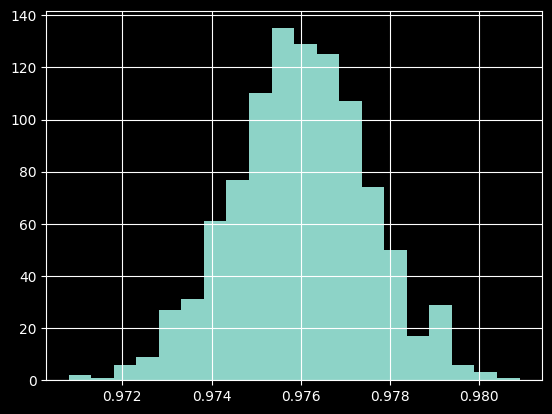

In [65]:
res = []
[res.append(analitics(10000)) for _ in range(1000)]
pd.Series(res).hist(bins = 20)

<a id="3"></a>
Задача

В первой урне находятся 10 белых и 4 черных шаров, а во второй 5 белых и 9 черных шаров.

 Из каждой урны вынули по шару. 
 
 Какова вероятность того, что оба шара окажутся черными?

In [67]:
p1 = 4/14
p2 = 9/14
round(p1 * p2, 3)

0.184

<Axes: >

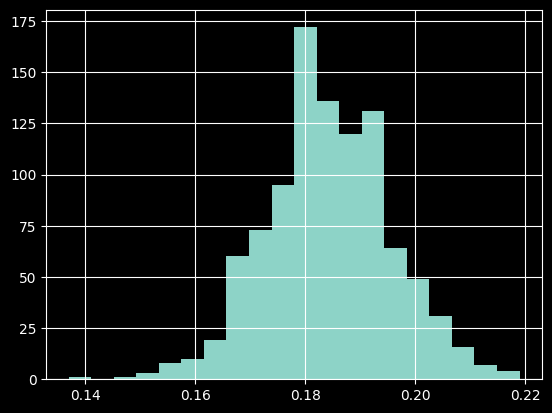

In [96]:
def balls(n):
    cnt = 0
    for _ in range(n):
        if np.random.binomial(1,4/14) + np.random.binomial(1,9/14) == 2:
            cnt = cnt + 1
    return cnt/n

res = []
[res.append(balls(1000)) for _ in range(1000)]
pd.Series(res).hist(bins = 20)

In [97]:
pd.Series(res).mean



np.float64(0.184244)

<a id="4"></a>
Вероятность хотя бы одного попадания в цель при четырех выстрелах равна 0,9984. 

Найдите вероятность попадания в цель при одном выстреле.

In [83]:
# попасть при одном выстреле - х, хотя бы 1 попадание при 4 выстрелах х + х + х + х = 4х
#x = 0.9984 / 4
#это неверно, 4х - вероятность не хотя бы одного. а только одного

# вероятность не попасть ни разу 1-0,9984 = x*x*x*x
x = (1-0.9984)**(1/4)
1 - x

0.7999999999999986

<a id="5"></a>

В конверте находится 10 лотерейных билетов, среди которых 3 выигрышных.

Из конверта последовательно извлекаются билеты. 

Найти вероятность того, что три первых лотерейных билета будут выигрышными.

3/10 * 2/9 * 1/8 = 0.0083


In [112]:
def tickets(n):
    cnt = 0
    for _ in range(n):
        p1 = np.random.binomial(1,3/10)
        if p1 == 1:
            p2 = np.random.binomial(1,2/9)
            if p2 == 1:
                p3 = np.random.binomial(1,3/8)
                if p3 == 1:
                    cnt = cnt + 1
    cnt = cnt/n
    return cnt

a = []
[a.append(tickets(1000)) for _ in range(1000)]
pd.Series(a).mean()


np.float64(0.025037000000000007)

<Axes: >

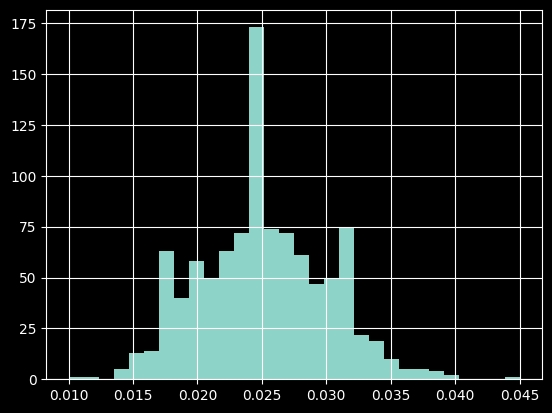

In [113]:
pd.Series(a).hist(bins = 30)

<a id="6"></a>
Бросаются 2 игральных кубика. 

Определите вероятность того, что произведение числа очков на обоих кубиках не превосходит 10.

In [143]:
def two_dices(n):
    cnt = 0
    for _ in range(n):
        if np.random.randint(1,7) * np.random.randint(1,7) <= 10:
            cnt = cnt + 1
    cnt = cnt/n
    return cnt

res = []
[res.append(two_dices(1000)) for _ in range(1000)]
pd.Series(res).mean()

np.float64(0.5285319999999999)

<Axes: >

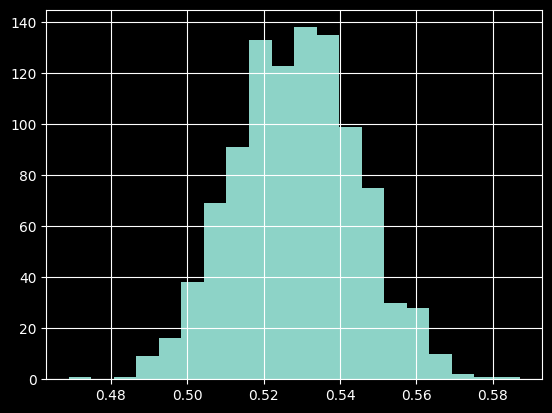

In [145]:
pd.Series(res).hist(bins = 20)